In [3]:
import pandas as pd
import os
import numpy as np
from sklearn.decomposition import IncrementalPCA, PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import json
from scipy.stats import zscore

def distance_to_line(line, pts, l0=None, p0=None):
    """
    line defined between l0 and line 
    points defined between p0 and pts
    """
    # line origin other than (0,0,0,..)
    if l0 is not None:
        line = line-l0
    # points origin other than (0,0,0,..)
    if p0 is not None:
        pts = pts-p0
    dp = np.dot(pts,line)
    pp = dp/np.linalg.norm(line)
    pn = np.linalg.norm(pts, axis=1)
    return np.sqrt(pn**2 - pp**2)

In [18]:
#get directories and open separated datasets

datadir = 'E:/Aaron/Combined_37C_Confocal_PCA_nospeedoutliers/'
savedir = datadir + 'Para-Nitro-Blebbistatin/'
if not os.path.exists(savedir):
    os.makedirs(savedir)


#limit data to the Para-Nitro-Blebbistatin experiments
FullFrame = pd.read_csv(datadir + 'Shape_Metrics_with_Digitized_PCs.csv', index_col=0)

################ add all of the different classifiers to the dataset
treat = []
experiment = []
exno = []
date = []
galv37Cdates = ['20231116', '20231122']

for f, m in zip(FullFrame['cell'].to_list(), FullFrame['frame'].to_list()):
    if 'CK666' in f:
        treat.append('CK666')
        experiment.append('Drug')
    elif 'ParaNitroBleb' in f:
        treat.append('Para-Nitro-Blebbistatin')
        experiment.append('Drug')
    elif 'DMSO' in f:
        treat.append('DMSO')
        experiment.append('Drug')
    elif any([x in f for x in galv37Cdates]):
        treat.append('Random')
        experiment.append('Galvanotaxis')
    else:
        print(f'Hey this one isnt captured: {f}')
    #get the date and experiment number on that date
    spl = f.split('_')
    date.append(spl[0])
    exno.append(spl[spl.index('cell')-1])

FullFrame['Date'] = date
FullFrame['Experiment_Number'] = exno
FullFrame['Treatment'] = treat
FullFrame['Experiment'] = experiment




TotalFrame = FullFrame[FullFrame.Experiment == 'Drug']
dates = ['20240624','20240626','20240701']
TotalFrame = TotalFrame[TotalFrame.Date.isin(dates)]
TotalFrame['Treatment'] = pd.Categorical(TotalFrame.Treatment.to_list(), categories=['DMSO','Para-Nitro-Blebbistatin'], ordered=True)
TotalFrame.index = TotalFrame.cell


,shcoeffs_L0M0C,shcoeffs_L0M1C,shcoeffs_L0M2C,shcoeffs_L0M3C,shcoeffs_L0M4C,shcoeffs_L0M5C,shcoeffs_L0M6C,shcoeffs_L0M7C,shcoeffs_L0M8C,shcoeffs_L0M9C,...,shcoeffs_L10M1S,shcoeffs_L10M2S,shcoeffs_L10M3S,shcoeffs_L10M4S,shcoeffs_L10M5S,shcoeffs_L10M6S,shcoeffs_L10M7S,shcoeffs_L10M8S,shcoeffs_L10M9S,shcoeffs_L10M10S
cell,,,,,,,,,,,,,,,,,,,,,
20240624_488EGFP-CAAX_01perDMSO_37C_1_cell_0_frame_31,16.001302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090097,0.170457,-0.182495,-0.176073,0.015738,0.079127,0.031129,0.040681,-0.164452,-0.140986
20240624_488EGFP-CAAX_01perDMSO_37C_1_cell_0_frame_24,15.469173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.026423,-0.131905,-0.033227,0.055560,-0.098650,0.150649,-0.107396,0.136367,-0.033836,0.174066
20240624_488EGFP-CAAX_01perDMSO_37C_1_cell_0_frame_35,15.210361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.133280,-0.000814,-0.093099,0.171777,-0.028182,0.109140,-0.251063,-0.160686,-0.151146,-0.341850
20240624_488EGFP-CAAX_01perDMSO_37C_1_cell_0_frame_180,14.784358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.110676,0.117399,-0.043534,-0.061152,0.019011,0.013220,0.101215,0.130623,-0.057304,-0.029326
20240624_488EGFP-CAAX_01perDMSO_37C_1_cell_0_frame_177,13.811932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043912,0.001664,0.047329,0.041740,0.027200,-0.104827,-0.089540,-0.255305,0.073682,0.018311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240701_488EGFP-CAAX_10uMParaNitroBlebbistatin_37C_2_cell_7_frame_97,17.797748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.189399,-0.065172,0.082223,-0.008623,0.069197,0.012770,-0.127771,0.036747,-0.044083,0.178560
20240701_488EGFP-CAAX_10uMParaNitroBlebbistatin_37C_2_cell_7_frame_91,18.498296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000569,-0.048045,-0.177349,0.108632,-0.030225,0.086370,0.041907,-0.087188,0.158234,-0.069534
20240701_488EGFP-CAAX_10uMParaNitroBlebbistatin_37C_2_cell_7_frame_89,18.641980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.020514,0.161249,0.046697,0.017738,0.001366,-0.083028,-0.175094,0.151547,0.084801,-0.086811


In [3]:
######### Perform PCA ################


#specify number of PCs and number of bins

nbins = 5
bins = list(range(1,nbins+1))
lmax = 10

#get only shcoeffs
coeff_df = shcoeffs[[x for x in shcoeffs.columns.to_list() if 'shcoeffs' in x]]
npcs = coeff_df.shape[1]


# Fit and transform the data
pca = PCA(n_components=npcs)
pca = pca.fit(coeff_df)
matrix_of_features_transform = pca.transform(coeff_df)


# Dataframe of transformed variable
pc_names = [f"PC{c}" for c in range(1, 1 + npcs)]
df_trans = pd.DataFrame(data=matrix_of_features_transform, columns=pc_names, index = coeff_df.index)


# Adjust the sign of PCs so that larger cells are represent by positive values
#need actual volume data to do this so needs to be combined with shape metrics
df_trans['Cell_Volume'] = shcoeffs.Cell_Volume
for pcid, pc_name in enumerate(pc_names):
    pearson = np.corrcoef(df_trans.Cell_Volume.values, df_trans[pc_name].values)
    if pearson[0, 1] < 0:
        df_trans[pc_name] *= -1
        pca.components_[pcid] *= -1
        
df_trans = df_trans.drop(columns = 'Cell_Volume')

In [100]:
###################### find cells at specific PC percentiles that are the closest to average in all other PCs ##########
#number of cells per percentile
cpp = 3
#percentiles to look at
percentiles = [1, 16, 50, 84, 99]
#range around percentile to look for cells
per_win = 1
#make dict to fill
cell_file = {}

for p in pc_names[0:3]:
    cell_file[p] = {}
    for per in percentiles:
        #get PC value associated with given percentile
        plow = np.percentile(df_trans[p].values,per-per_win)
        phigh = np.percentile(df_trans[p].values,per+per_win)
        #get cells near that percentile for that particular PC
        cells_in = df_trans[df_trans[p].between(plow, phigh, inclusive='both')].index
        distances = distance_to_line(line = pca.components_[pc_names.index(p)],
                        pts = df_trans.loc[cells_in].to_numpy())
        cell_file[p][per] = pd.Series(distances, index = cells_in).sort_values().iloc[:cpp].index.to_list()

#write dict to file      
with open(savedir+'VIEWs_index.txt', 'w') as convert_file:
     convert_file.write(json.dumps(cell_file))

In [20]:
############## find linear discriminate axis for a particular factor ##################

ldd = TotalFrame[[x for x in TotalFrame.columns.to_list() if 'coeff' in x]]
lda = LinearDiscriminantAnalysis()
lda = lda.fit(ldd, TotalFrame.Treatment)
lddt = lda.transform(ldd)


(array([  2.,   5.,   1.,   7.,   2.,  15.,  27.,  25.,  53.,  71., 113.,
        150., 187., 245., 361., 431., 484., 614., 586., 659., 594., 518.,
        465., 378., 345., 271., 194., 122., 109.,  72.,  45.,  30.,  24.,
         25.,   6.,   3.,   4.,   3.,   3.,   1.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([-3.79563042, -3.59326562, -3.39090082, -3.18853601, -2.98617121,
        -2.78380641, -2.58144161, -2.37907681, -2.176712  , -1.9743472 ,
        -1.7719824 , -1.5696176 , -1.3672528 , -1.16488799, -0.96252319,
        -0.76015839, -0.55779359, -0.35542879, -0.15306398,  0.04930082,
         0.25166562,  0.45403042,  0.65639522,  0.85876003,  1.06112483,
         1.26348963,  1.46585443,  1.66821924,  1.87058404,  2.07294884,
         2.27531364,  2.47767844,  2.68004325,  2.88240805,  3.08477285,
         3.28713765,  3.48950245,  3.69186726,  3.89423206,  4.09659686,
         4.29896166,  4.50132646,  4.70369127,  4.90605607,  5.10842087,
 

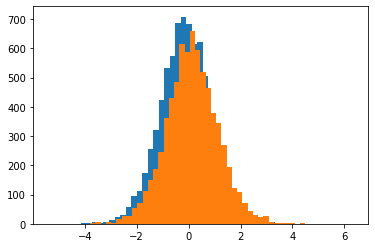

In [22]:
############ confirming separation of categories along LDA ###############
import matplotlib.pyplot as plt
lda_data = pd.Series([x[0] for x in lddt], index = TotalFrame.Treatment)
plt.hist(lda_data[lda_data.index == 'DMSO'], bins = 50)
plt.hist(lda_data[lda_data.index == 'Para-Nitro-Blebbistatin'], bins = 50)

In [41]:
###################### find cells at specific LDA percentiles that are the closest to average in all other PCs ##########

#construct dataframe using LD data
lda_data = pd.Series([x[0] for x in lddt], index = ldd.index)

#number of cells per percentile
cpp = 3
#percentiles to look at
percentiles = [1, 16, 50, 84, 99]
#range around percentile to look for cells
per_win = 1
#make dict to fill
cell_file = {}


plist = []
clist = []
for per in percentiles:
    #get PC value associated with given percentile
    plow = np.percentile(lda_data.values,per-per_win)
    phigh = np.percentile(lda_data.values,per+per_win)
    #get cells near that percentile for that particular PC
    cells_in = lda_data[lda_data.between(plow, phigh, inclusive='both')].index
    distances = distance_to_line(line = lda.coef_[0],
                    pts = ldd.loc[cells_in].to_numpy())
    clist.extend(pd.Series(distances, index = cells_in).sort_values().iloc[:cpp].index.to_list())
    plist.extend([per]*cpp)

lda_view_frame = pd.DataFrame(np.array([plist,clist]).T, columns = ['percentile','cell'])
lda_view_frame.to_csv(savedir+'LDA_VIEWs_index.csv')


In [39]:
plist, clist

([1, 1, 1, 16, 16, 16, 50, 50, 50, 84, 84, 84, 99, 99, 99],
 ['20240701_488EGFP-CAAX_10uMParaNitroBlebbistatin_37C_2_cell_2_frame_180',
  '20240624_488EGFP-CAAX_10uMParaNitroBlebbistatin_37C_2_cell_3_frame_38',
  '20240624_488EGFP-CAAX_01perDMSO_37C_1_cell_42_frame_82',
  '20240624_488EGFP-CAAX_10uMParaNitroBlebbistatin_37C_2_cell_25_frame_181',
  '20240624_488EGFP-CAAX_10uMParaNitroBlebbistatin_37C_1_cell_5_frame_90',
  '20240624_488EGFP-CAAX_10uMParaNitroBlebbistatin_37C_2_cell_4_frame_172',
  '20240624_488EGFP-CAAX_10uMParaNitroBlebbistatin_37C_2_cell_8_frame_30',
  '20240626_488EGFP-CAAX_10uMParaNitroBlebbistatin_37C_2_cell_8_frame_160',
  '20240624_488EGFP-CAAX_10uMParaNitroBlebbistatin_37C_2_cell_8_frame_42',
  '20240626_488EGFP-CAAX_01perDMSO_37C_2_cell_14_frame_131',
  '20240626_488EGFP-CAAX_01perDMSO_37C_3_cell_0_frame_113',
  '20240624_488EGFP-CAAX_10uMParaNitroBlebbistatin_37C_2_cell_20_frame_103',
  '20240626_488EGFP-CAAX_01perDMSO_37C_2_cell_2_frame_6',
  '20240626_488EGFP